# Linear Regression
## Gradient Descent
The objective of linear regression is to minimize the cost function:
$$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$
where the hypothesis $ h_\theta(x) $ is defined by the linear model:
$$
    h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1 \space + \space ...
$$

Recall that the parameters of your model are the $ \theta_j $ values. These are the values you will adjust in order to minimize the cost function $ J(\theta) $. One common method to perform this optimization is the **batch gradient descent algorithm**. In batch gradient descent, the parameters are updated as follows for each iteration:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

where:

- $ \alpha $ is the learning rate
- $ m $ is the number of training examples
- $ h_{\theta}(x^{(i)}) $ is the predicted value for the $ i $-th training example
- $ y^{(i)} $ is the actual target output for the $ i $-th training example
- $ x_j^{(i)} $ denotes the feature $ j $ of the $ i $-th training example

The iteration performs these updates for all $ \theta_j $ (for $ j = 0, 1, \ldots, n )$ simultaneously in each step until convergence.

## Normal Equations
The closed-form solution to linear regression is:
$$ \theta = (X^T X)^{-1} X^T \vec{y}$$
Using this formula does not require any feature scaling, and you get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term ($θ_0$).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sklearn.linear_model
plt.style.use('ggplot')
# plt.style.available

In [18]:
def J(X, y):
    """
    Compute the cost function and gradients for linear regression using Mean Squared Error (MSE).
    
    The function `J` takes as input the feature matrix `X` and target values `y`, and returns a pair of functions:
    - hypothesis: This function computes the predictions for a given parameter vector `theta`
    - cost: This function computes the cost (or objective) of the model for a given parameter vector `theta` using MSE.
    - gradients: This function computes the gradient of the cost function with respect to the parameters `theta`.
    """
    m = len(y)
    ones = np.ones((m, 1))
    X_padded = np.hstack((ones, X))
    
    hypothesis = lambda theta:  X_padded @ np.array(theta)
    cost = lambda theta: (0.5/m) * np.sum((hypothesis(theta) - y)**2)
    gradients = lambda theta: (1 / m) * (hypothesis(theta) - y) @ X_padded
    
    return hypothesis, cost, gradients

In [99]:
def gradient_descent(X, y, theta0=None, learning_rate=0.01, iterations=100):
    """
    Perform linear regression using batch gradient descent to minimize 
    the cost function.
    
    This function fits a linear regression model to the input dataset 
    by iteratively adjusting the parameter vector `theta` using gradient descent.
    """
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    hypothesis, cost, gradients = J(X, y)
    predictions, costs, grads = [], [], []
    for i in range(iterations):
        p, c, g = hypothesis(theta), cost(theta), gradients(theta)
        theta -= learning_rate * g
        predictions.append(p) 
        costs.append(c) 
        grads.append(g)
    return {'theta': theta, 'costs': costs, 'gradients': grads, 'predictions': predictions}

In [100]:
def linear_reg1(X, y, theta0=None, learning_rate=0.01, iterations=100):
    fit = gradient_descent(X, y, theta0, learning_rate, iterations)
    return fit['theta']

In [101]:
def linear_reg2(X, y, theta0=None):
    """
    Perform linear regression using a numerical optimization algorithm (BFGS) to minimize the cost function.
    
    This function fits a linear regression model to the input dataset by finding the optimal parameter vector `theta` using the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm.
    """

    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, jac=gradients, x0=theta, method='BFGS')
    return result

In [102]:
def linear_reg3(X, y, theta0=None):
    """
    Perform linear regression using a numerical optimization algorithm (BFGS) to minimize the cost function.
    
    This function fits a linear regression model to the input dataset by finding the optimal parameter vector `theta` using the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm. This version does not use the derivative (gradient)
    """

    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    predictions, cost, gradients = J(X, y)
    result = scipy.optimize.minimize(fun=cost, x0=theta, method='BFGS')
    return result

In [103]:
def linear_reg4(X, y):
    """
    Fits a linear regression model to the input data by directly computing the optimal parameter vector `theta` using 
    the Normal Equation: theta = (X^T * X)^(-1) * X^T * y
    """
    ones = np.ones((len(X), 1))
    X_padded = np.hstack((ones, X))
    term1 = np.linalg.inv(X_padded.T.dot(X_padded))
    term2 = X_padded.T.dot(y)
    return term1 @ term2

In [104]:
def linear_reg5(X, y):
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    return model.intercept_, model.coef_

In [105]:
def plotData(X, y, theta=None, title=""):
    plt.scatter(X, y)
    if theta is not None:
        ones = np.ones((len(X), 1))
        X_padded = np.hstack((ones, X))
        hypothesis = X_padded @ np.array(theta)
        plt.plot(X, hypothesis, color='black')
    plt.title(title)
    plt.show()

## Linear Regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering diﬀerent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

In [106]:
ex1datatxt="6.1101,17.592;5.5277,9.1302;8.5186,13.662;7.0032,11.854;5.8598,6.8233;8.3829,11.886;7.4764,4.3483;8.5781,12;6.4862,6.5987;5.0546,3.8166;5.7107,3.2522;14.164,15.505;5.734,3.1551;8.4084,7.2258;5.6407,0.71618;5.3794,3.5129;6.3654,5.3048;5.1301,0.56077;6.4296,3.6518;7.0708,5.3893;6.1891,3.1386;20.27,21.767;5.4901,4.263;6.3261,5.1875;5.5649,3.0825;18.945,22.638;12.828,13.501;10.957,7.0467;13.176,14.692;22.203,24.147;5.2524,-1.22;6.5894,5.9966;9.2482,12.134;5.8918,1.8495;8.2111,6.5426;7.9334,4.5623;8.0959,4.1164;5.6063,3.3928;12.836,10.117;6.3534,5.4974;5.4069,0.55657;6.8825,3.9115;11.708,5.3854;5.7737,2.4406;7.8247,6.7318;7.0931,1.0463;5.0702,5.1337;5.8014,1.844;11.7,8.0043;5.5416,1.0179;7.5402,6.7504;5.3077,1.8396;7.4239,4.2885;7.6031,4.9981;6.3328,1.4233;6.3589,-1.4211;6.2742,2.4756;5.6397,4.6042;9.3102,3.9624;9.4536,5.4141;8.8254,5.1694;5.1793,-0.74279;21.279,17.929;14.908,12.054;18.959,17.054;7.2182,4.8852;8.2951,5.7442;10.236,7.7754;5.4994,1.0173;20.341,20.992;10.136,6.6799;7.3345,4.0259;6.0062,1.2784;7.2259,3.3411;5.0269,-2.6807;6.5479,0.29678;7.5386,3.8845;5.0365,5.7014;10.274,6.7526;5.1077,2.0576;5.7292,0.47953;5.1884,0.20421;6.3557,0.67861;9.7687,7.5435;6.5159,5.3436;8.5172,4.2415;9.1802,6.7981;6.002,0.92695;5.5204,0.152;5.0594,2.8214;5.7077,1.8451;7.6366,4.2959;5.8707,7.2029;5.3054,1.9869;8.2934,0.14454;13.394,9.0551;5.4369,0.61705"
ex1data = np.mat(ex1datatxt)
X1 = np.array(ex1data[:, 0]) # x refers to the population size in 10,000s
y1 = np.array(ex1data[:, 1]).flatten() # y refers to the profit in $10,000s
print(X1[0:3])
print(y1[0:3])

[[6.1101]
 [5.5277]
 [8.5186]]
[17.592   9.1302 13.662 ]


In [107]:
linear_reg1(X1, y1)

array([-0.57655623,  0.85958153])

In [108]:
linear_reg2(X1, y1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.4769713759803995
        x: [-3.896e+00  1.193e+00]
      nit: 8
      jac: [-4.054e-07  9.034e-06]
 hess_inv: [[ 5.348e+00 -5.338e-01]
            [-5.338e-01  6.553e-02]]
     nfev: 9
     njev: 9

In [109]:
linear_reg3(X1, y1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.476971375980298
        x: [-3.896e+00  1.193e+00]
      nit: 8
      jac: [-4.768e-07  9.000e-06]
 hess_inv: [[ 5.348e+00 -5.338e-01]
            [-5.338e-01  6.553e-02]]
     nfev: 27
     njev: 9

In [110]:
linear_reg4(X1, y1)

array([-3.89578088,  1.19303364])

In [111]:
linear_reg5(X1, y1)

(-3.8957808783118537, array([1.19303364]))

## Visualizing fit and cost

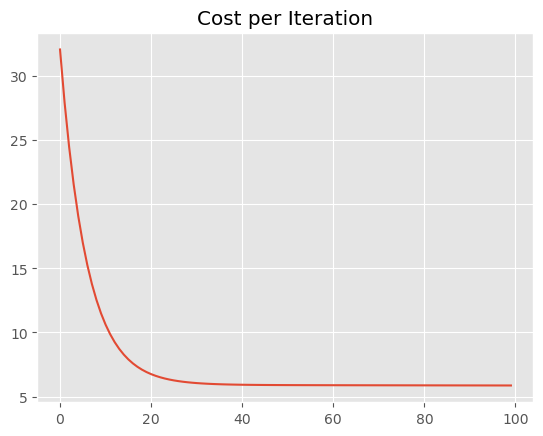

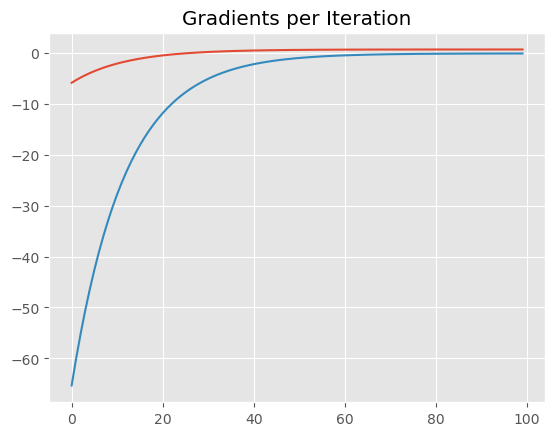

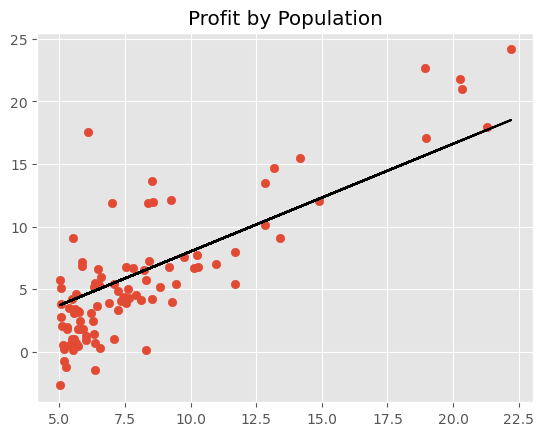

In [120]:
fit = gradient_descent(X1, y1, learning_rate=0.001, iterations=100)
theta = fit['theta']
costs = fit['costs']
grads = fit['gradients']
plt.plot(costs)
plt.title("Cost per Iteration")
plt.show()
plt.plot(grads)
plt.title("Gradients per Iteration")
plt.show()
plotData(X1, y1, linear_reg1(X1, y1), "Profit by Population")

## Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over
a 2-dimensional grid of θ0 and θ1 values. 

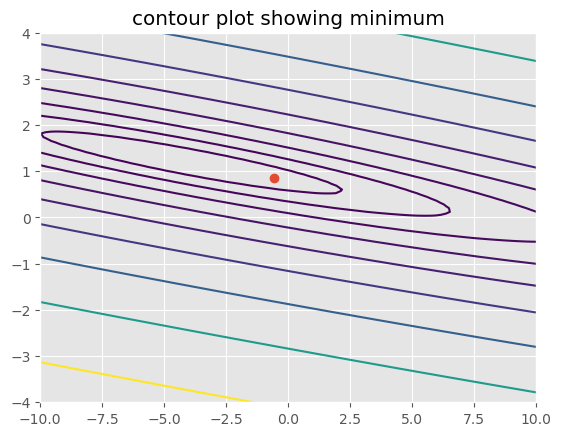

In [121]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-4, 4, 100)
J_vals = np.zeros((len(theta0), len(theta1)))

hypothesis, cost, gradients = J(X1, y1)
for i in range(len(theta0)):
    for j in range(len(theta1)):
        J_vals[j, i] = cost(np.array([theta0[i], theta1[j]]))

trough = linear_reg1(X1, y1)
plt.plot(trough[0], trough[1], marker='o')

plt.contour(theta0, theta1, J_vals, levels=np.logspace(-2, 3, 20))
plt.title("contour plot showing minimum")
plt.show()

## Linear Regression with more than one variable
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

In [16]:
ex2datatxt = "2104,3,399900;1600,3,329900;2400,3,369000;1416,2,232000;3000,4,539900;1985,4,299900;1534,3,314900;1427,3,198999;1380,3,212000;1494,3,242500;1940,4,239999;2000,3,347000;1890,3,329999;4478,5,699900;1268,3,259900;2300,4,449900;1320,2,299900;1236,3,199900;2609,4,499998;3031,4,599000;1767,3,252900;1888,2,255000;1604,3,242900;1962,4,259900;3890,3,573900;1100,3,249900;1458,3,464500;2526,3,469000;2200,3,475000;2637,3,299900;1839,2,349900;1000,1,169900;2040,4,314900;3137,3,579900;1811,4,285900;1437,3,249900;1239,3,229900;2132,4,345000;4215,4,549000;2162,4,287000;1664,2,368500;2238,3,329900;2567,4,314000;1200,3,299000;852,2,179900;1852,4,299900;1203,3,239500"
ex2data = np.mat(ex2datatxt)
X2 = np.array(ex2data[:, 0:-1])
y2 = np.array(ex2data[:, -1]).flatten()
print(X2[0:3])
print(y2[0:3])

[[2104    3]
 [1600    3]
 [2400    3]]
[399900 329900 369000]


In [17]:
# TODO: This function call does not converge
linear_reg1(X2, y2, iterations=60)

array([-5.46625520e+278, -1.26250402e+282, -1.82347442e+279])

In [18]:
linear_reg2(X2, y2)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2043280050.602828
        x: [ 8.960e+04  1.392e+02 -8.738e+03]
      nit: 8
      jac: [ 4.540e-05  9.938e-02  1.504e-04]
 hess_inv: [[ 1.878e+01 -3.463e-04 -5.391e+00]
            [-3.463e-04  2.357e-06 -1.378e-03]
            [-5.391e+00 -1.378e-03  2.570e+00]]
     nfev: 51
     njev: 39

In [19]:
linear_reg3(X2, y2)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2043296679.0206668
        x: [ 9.033e+04  1.393e+02 -9.010e+03]
      nit: 12
      jac: [-4.800e+01 -6.022e+04 -1.760e+02]
 hess_inv: [[ 1.100e+02 -5.319e-02  6.293e-01]
            [-5.319e-02  2.617e-05 -5.313e-04]
            [ 6.293e-01 -5.313e-04  1.641e-01]]
     nfev: 260
     njev: 62

In [20]:
linear_reg4(X2, y2)

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [21]:
linear_reg5(X2, y2)

(89597.90954279734, array([  139.21067402, -8738.01911233]))